In [75]:
from sklearn import datasets
data=datasets.load_iris()

In [76]:
X=data.data
y=data.target

In [77]:
import pandas as pd
df = pd.DataFrame(X[:,0], columns=['sepal_length'])
df['sepal_width']=X[:,1]
df['petal_length']=X[:,2]
df['petal_width']=X[:,3]
df['target']=y
df=df.sample(frac=1)
df

,sepal_length,sepal_width,petal_length,petal_width,target
21,5.1,3.7,1.5,0.4,0
39,5.1,3.4,1.5,0.2,0
50,7.0,3.2,4.7,1.4,1
46,5.1,3.8,1.6,0.2,0
51,6.4,3.2,4.5,1.5,1
...,...,...,...,...,...
118,7.7,2.6,6.9,2.3,2
94,5.6,2.7,4.2,1.3,1
111,6.4,2.7,5.3,1.9,2
34,4.9,3.1,1.5,0.2,0


In [78]:

y=df['target'].to_numpy()
X=df.drop(['target'],axis=1).to_numpy()

In [79]:
X.shape, y.shape

((150, 4), (150,))

In [80]:
y

array([0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 2, 0,
       0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0,
       2, 1, 0, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 2, 2,
       0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0,
       1, 2, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 1, 2, 0, 2])

In [81]:
x1_min, x1_max = X[:, 2].min() - .5, X[:, 2].max() + .5
x2_min, x2_max = X[:, 3].min() - .5, X[:, 3].max() + .5

In [82]:
import matplotlib.pyplot as plt

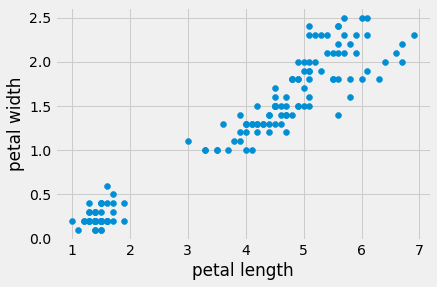

In [83]:
plt.scatter(X[:,2], X[:,3])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

In [84]:
from sklearn.cluster import KMeans
kmeans_param = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42,}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_param)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
sse

[681.3705999999999,
 152.34795176035792,
 78.85144142614602,
 57.265619047619055,
 46.46117267267268,
 41.70590692640694,
 37.02641909260331,
 30.64660670469881,
 28.191826316957897,
 26.58325221458967]

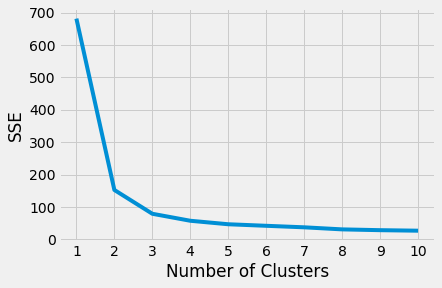

In [85]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [86]:
K=3
kmeans = KMeans(init="random", n_clusters=K, n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)

KMeans(init='random', n_clusters=3, random_state=42)

In [87]:
kmeans.inertia_

78.85144142614602

In [88]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ]])

In [89]:
y_pred=kmeans.labels_
y_pred.shape

(150,)

([], [])

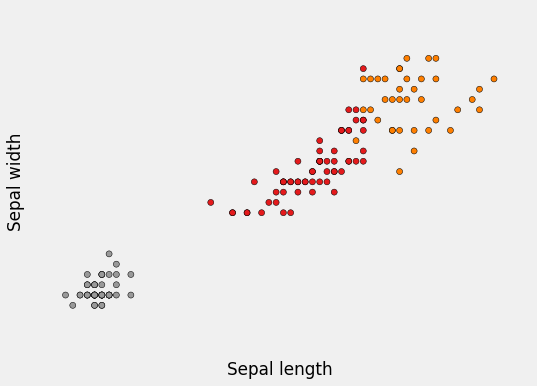

In [90]:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 2], X[:, 3], c=y_pred, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.xticks(())
plt.yticks(())

In [91]:
sum=0
for i in range(len(y)):
    sum+=(abs(y[i]-y_pred[i]))
    
sum

212